In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn import  datasets
iris=datasets.load_iris()

In [2]:
data = pd.DataFrame(iris.data,columns=iris.feature_names)

In [3]:
feature = iris.feature_names

In [4]:
data['label']=iris.target

In [5]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

In [7]:
data.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

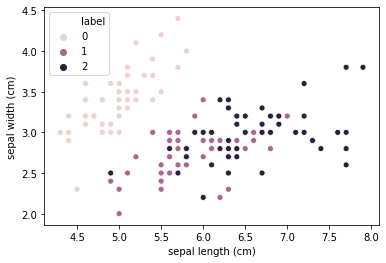

In [8]:
sns.scatterplot(x=data['sepal length (cm)'],y=data['sepal width (cm)'],hue=data['label'])

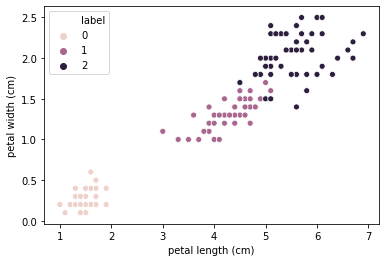

In [9]:
sns.scatterplot(x=data['petal length (cm)'],y=data['petal width (cm)'],hue=data['label'])

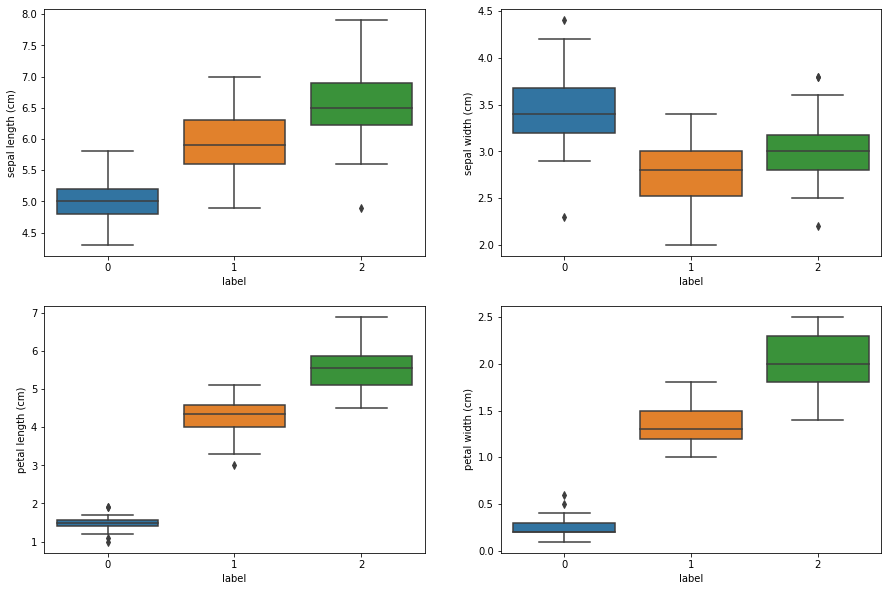

In [10]:
## Box Plot
fig,axs = plt.subplots(ncols=2, nrows=2,figsize=(15,10))
ax = axs.flat
i=0
for f in feature:
    sns.boxplot(x=data['label'],y=data[f],ax=ax[i])
    i+=1
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


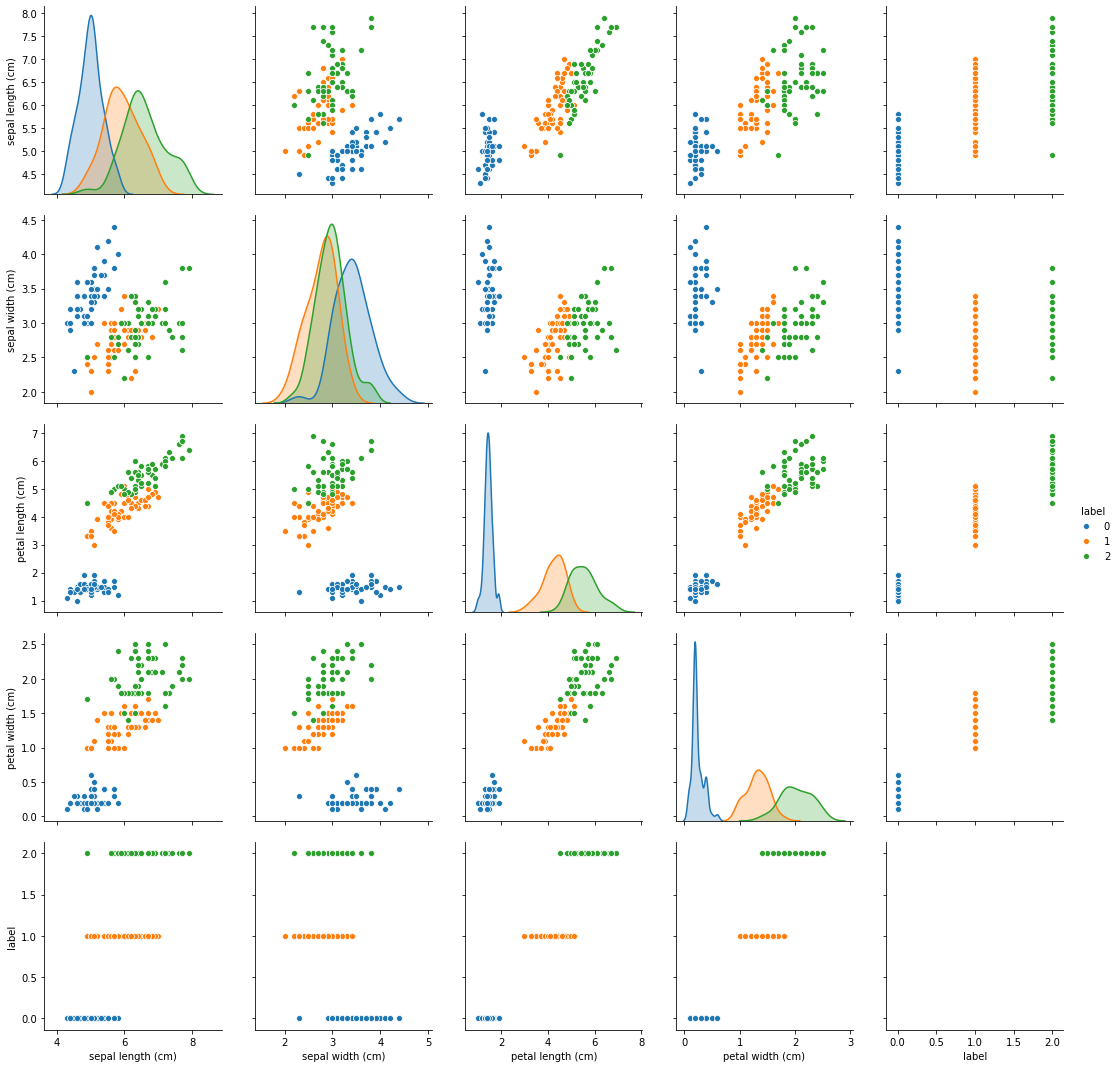

In [11]:
sns.pairplot(data,hue='label',size=3)

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_recall_curve,auc
from sklearn.model_selection import train_test_split


In [13]:
X=data.drop(columns='label')
y = data['label']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43)


In [14]:
def model_validation(y_test,y_pred):
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:,1]
model_validation(y_test,y_pred)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.88      0.94        17
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

[[15  0  0]
 [ 0 15  2]
 [ 0  0 13]]
0.9555555555555556


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


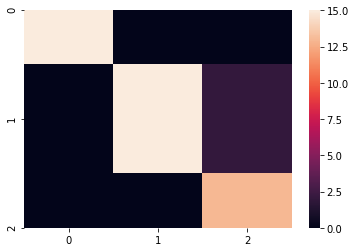

In [16]:
sns.heatmap(confusion_matrix(y_test,y_pred))

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

model_validation(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.89      0.94      0.91        17
           2       0.92      0.85      0.88        13

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

[[15  0  0]
 [ 0 16  1]
 [ 0  2 11]]
0.9333333333333333


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
